In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv('dataset.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
## using random forest classifier 
X = data.drop(columns=['cardio'], axis=1)
y = data['cardio']

In [6]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier 

rfr = RandomForestClassifier()


In [34]:
## now using grid search 
from sklearn.model_selection import GridSearchCV
import time
param_grid = {
    'n_estimators': [10, 20, 30],           
    'max_depth': [4, 5,10],              
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'bootstrap': [True, False]                
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

start = time.time()
y_pred = best_model.predict(X_test)
end = time.time()
total_time_rf = start-end

Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\Sameer\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
accuracy=accuracy_score(Y_test,y_pred)
accuracy

0.7373571428571428

In [36]:
precision=precision_score(Y_test,y_pred)
precision

0.7667573188289873

In [37]:
recall=recall_score(Y_test,y_pred)
recall

0.6835424985738734

In [38]:
f1=f1_score(Y_test,y_pred)
f1

0.7227625725703084

In [39]:
matrix=confusion_matrix(Y_test,y_pred)
matrix

array([[5530, 1458],
       [2219, 4793]], dtype=int64)

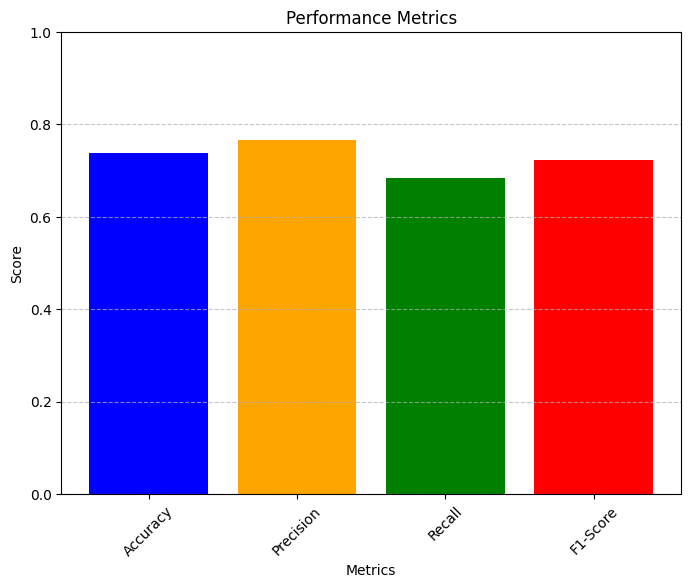

In [40]:
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Since metrics are between 0 and 1
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

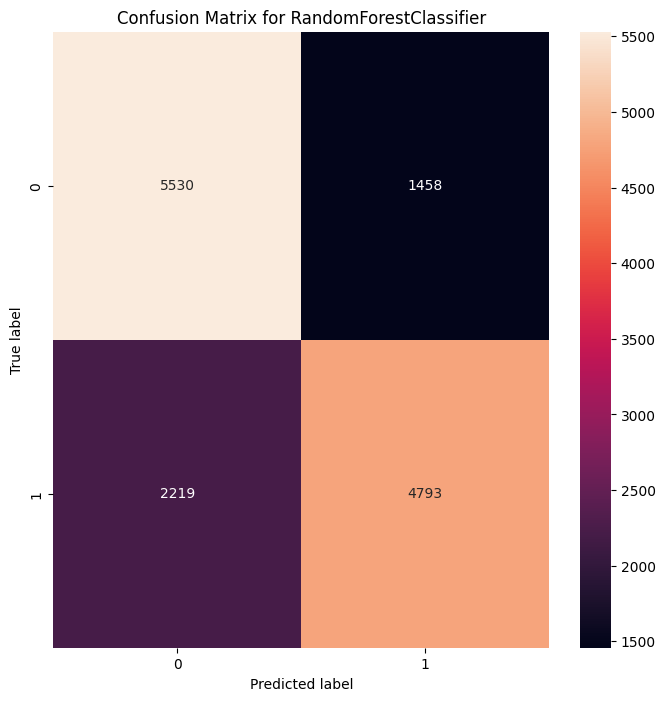

In [44]:
## confusion matrix
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(matrix, annot=True, fmt='d', color='blue')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**LOGISTIC REGRESSION**

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import time

param_grid = {
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'],               
    'max_iter': [100, 200,100]
}

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=8)  
data_pca = pca.fit_transform(scaled_data)

X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

logreg=LogisticRegression()

random_search_cv_lr=RandomizedSearchCV(estimator=logreg,cv=3,param_distributions=param_grid,verbose=2,n_jobs=2)

start_time=time.time()
random_search_cv_lr.fit(X_train,y_train)

best_extimators_lr=random_search_cv_lr.best_estimator_

pertict_lr=best_extimators_lr.predict(X_test)

end_time=time.time()
total_time_lr=end_time-start_time
accuracy_lr=accuracy_score(y_test,pertict_lr)
precision_lr=precision_score(y_test,pertict_lr)
recall_lr=recall_score(y_test,pertict_lr)
f1_lr=f1_score(y_test,pertict_lr)
cm_lr=confusion_matrix(y_test,pertict_lr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [9]:
print(cm_lr)
print(accuracy_lr)
print(precision_lr)
print(recall_lr)
print(f1_lr)
print(f"{total_time_lr:.2f}")

[[6608  380]
 [ 385 6627]]
0.9453571428571429
0.9457685171970887
0.945094124358243
0.9454312005135888
59.46


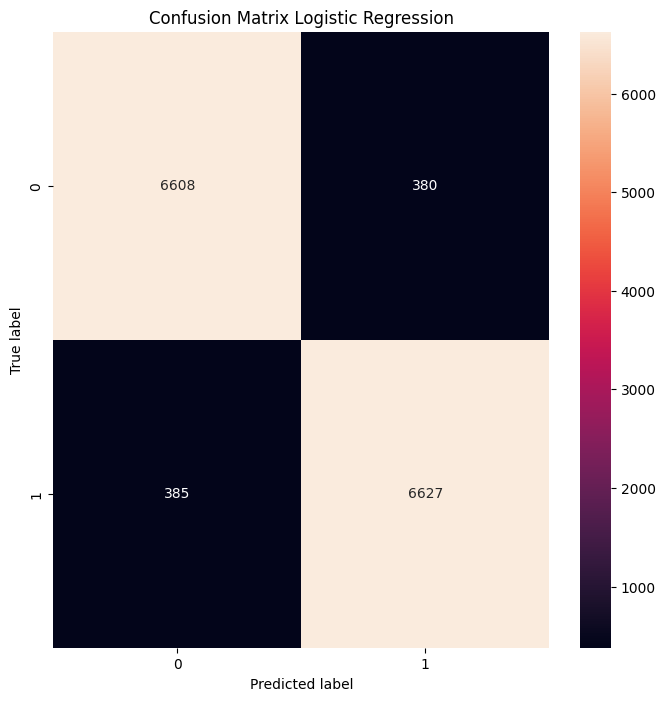

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(8, 8))
sb.heatmap(cm_lr, annot=True, fmt='d', color='blue')
plt.title('Confusion Matrix Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

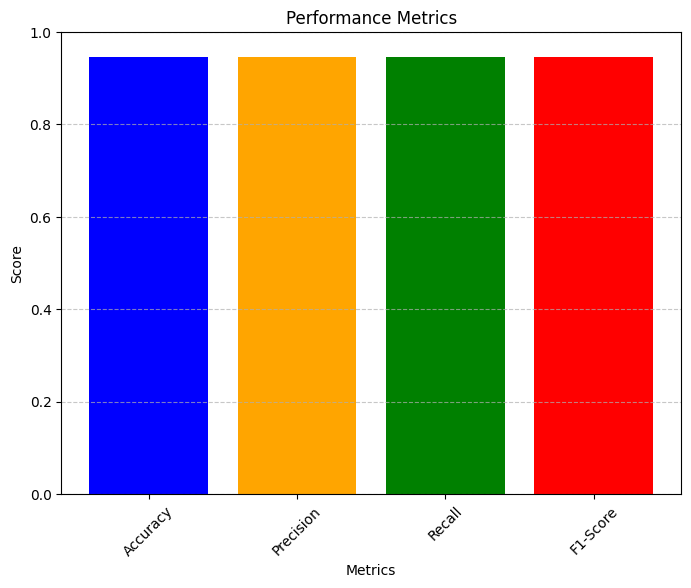

In [13]:
metrics = [accuracy_lr, precision_lr, recall_lr, f1_lr]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Since metrics are between 0 and 1
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**SVM**

In [19]:
from sklearn.svm import SVC


X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,y,random_state=42,test_size=0.3)

paramiter_grid={
    "C":[3,15,90],
    "gamma":[1, 0.1,0.001],
    "kernel":['rbf','linear']
}

svm=SVC(random_state=42)

random_search=RandomizedSearchCV(estimator=svm,param_distributions=paramiter_grid,cv=3,verbose=2,n_jobs=3)

start_time=time.time()
random_search.fit(X_train,Y_train)
end_time=time.time()

total_time_svm=end_time-start_time

best_estimator_svm=random_search.best_estimator_
print(best_estimator_svm)


perdict_svm=best_estimator_svm.predict(X_test)
accuracy_svm=accuracy_score(Y_test,perdict_svm)
precision_svm=precision_score(Y_test,perdict_svm)
recall_svm=recall_score(Y_test,perdict_svm)
f1_svm=f1_score(Y_test,perdict_svm)
cm_svm=confusion_matrix(Y_test,perdict_svm)
print(cm_svm)

print(accuracy_svm)
print(precision_svm)
print(recall_svm)
print(f1_svm)
print(f"{total_time_svm:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
SVC(C=3, gamma=0.001, kernel='linear', random_state=42)
[[10461     0]
 [    0 10539]]
1.0
1.0
1.0
1.0
1153.21


In [20]:
print(f1_svm)

1.0


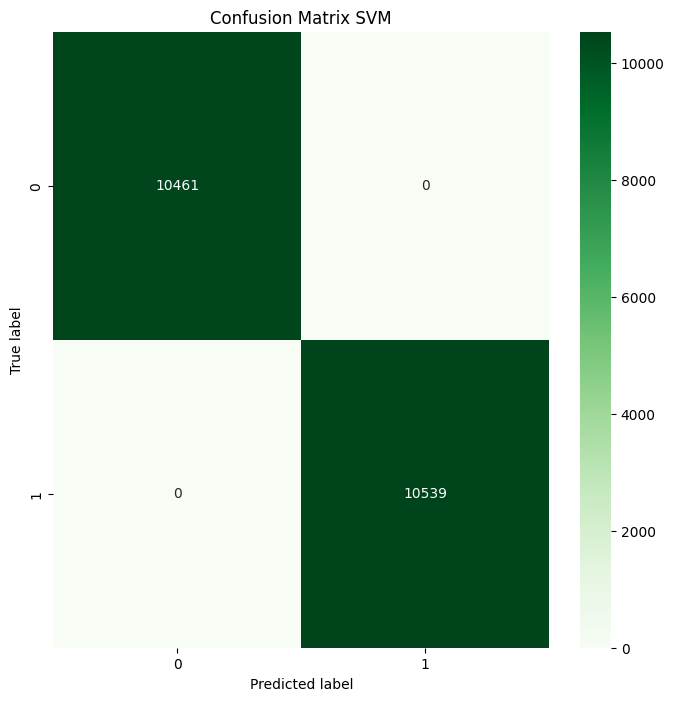

In [21]:
plt.figure(figsize=(8, 8))
sb.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

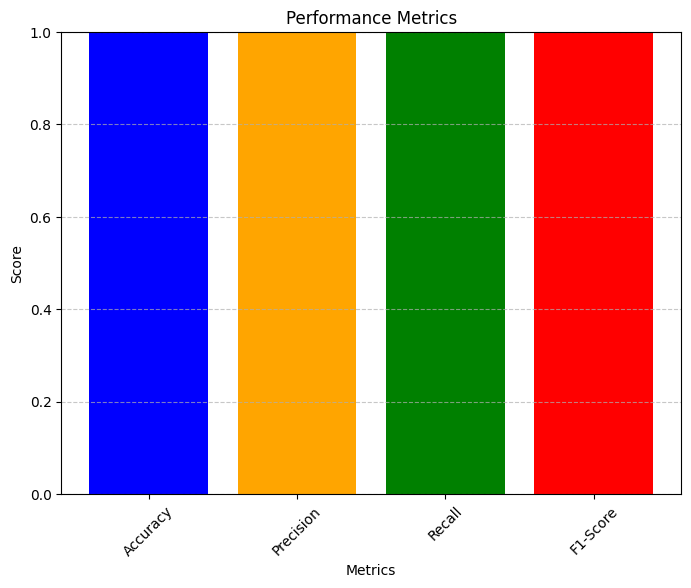

In [22]:
metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Since metrics are between 0 and 1
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
comparision_of_algorithms={

    "Accuracy":[accuracy,accuracy_svm,accuracy_lr],
    'Precision':[precision,precision_svm,precision_lr],
    'Recal':[recall,recall_svm,recall_lr],
    'F1_score':[f1,f1_svm,f1_lr],
    'Best_Parameters':[best_params,best_estimators_svm,best_extimators_lr],
     "Time (s)":[total_time_rf,total_time_svm,total_time_lr],
    "Comments":['Best for large dataset with high dimentions','Not good for large ad imbalance dataset',"Faster but not for high dimentional data"]
   
    
}